<a href="https://colab.research.google.com/github/jain777/Technical-Indicators-FA-Project/blob/main/Hyperparametertuning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 428 kB/s 
     |████████████████████████████████| 6.4 MB 10.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 10.4 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [102]:
stocksymbols = ['HDFCBANK.NS']
startdate = date(2015,1,1)
end_date = date(2019,12,31)
print(end_date)
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data

2019-12-31


In [103]:
df = getMyPortfolio(stocksymbols)


[*********************100%***********************]  1 of 1 completed


In [104]:
CustomStrategy = ta.Strategy(
    name="Defining Various TI to be used",
    description="MFI,RSI & EMA 30,50,100",
    ta=[
        {"kind": "mfi",}, #volume
        {"kind": "rsi"}, #momentum
        {"kind": "ema", "length": 14}, #trend
        {"kind": "ema", "length": 50}, #trend
        {"kind": "ema", "length": 100}, #trend
        {"kind" : "obv"}
    ]
)
df.ta.strategy(CustomStrategy)

In [105]:
df.rename(columns = {'EMA_14':'Short', 'EMA_50':'Middle', 'EMA_100':'Long'}, inplace = True)
df['OBV_EMA'] = df['OBV'].ewm(span=14).mean()

In [106]:
df.tail(200)

,Open,High,Low,Close,Adj Close,Volume,MFI_14,RSI_14,Short,Middle,Long,OBV,OBV_EMA
Date,,,,,,,,,,,,,
2019-03-01,1043.125000,1050.449951,1038.500000,1041.675049,1016.669617,4676464,47.082786,45.199479,1049.753115,1048.663439,1039.995182,397008744.0,4.028368e+08
2019-03-05,1044.449951,1055.550049,1035.000000,1053.550049,1028.259521,5918638,49.234773,51.139562,1050.259373,1048.855071,1040.263595,402927382.0,4.028489e+08
2019-03-06,1055.000000,1055.150024,1045.275024,1052.125000,1026.868652,4229022,48.578333,50.433075,1050.508123,1048.983303,1040.498475,398698360.0,4.022955e+08
2019-03-07,1054.800049,1065.000000,1047.500000,1063.250000,1037.726562,5102426,56.270257,55.590978,1052.207040,1049.542782,1040.949000,403800786.0,4.024962e+08
2019-03-08,1057.525024,1065.000000,1054.724976,1064.099976,1038.556274,3526730,63.095611,55.967978,1053.792765,1050.113652,1041.407435,407327516.0,4.031404e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,1299.000000,1304.000000,1288.800049,1302.400024,1281.883057,5097891,58.880701,67.172380,1275.149199,1250.446878,1222.213400,436711588.0,4.221179e+08
2019-12-24,1298.599976,1301.099976,1286.949951,1289.150024,1268.841797,3589604,60.253044,59.681157,1277.015976,1251.964648,1223.538877,433121984.0,4.235852e+08
2019-12-26,1289.699951,1291.849976,1264.650024,1270.449951,1250.436279,7474879,51.961486,51.031270,1276.140506,1252.689562,1224.467810,425647105.0,4.238601e+08


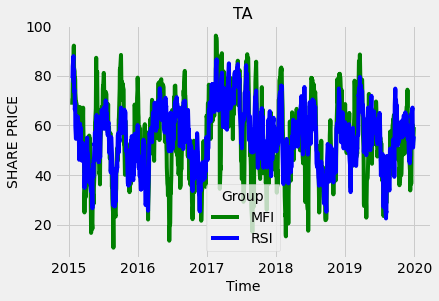

In [107]:
plt.plot(df['MFI_14'], label='MFI', color='green')
plt.plot(df['RSI_14'], label='RSI', color='blue')

#add legend
plt.legend(title='Group')

#add axes labels and a title
plt.ylabel('SHARE PRICE', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('TA', fontsize=16)

#display plot
plt.show()

In [108]:
#Trend Indicator
def buy_sell_EMA():
  df['emasig'] = 0
  df['buyprice'] = 0.0
  flag_long = False
  flag_short = False
  for i in range(0,len(df)):
    if df['Middle'][i] < df['Long'][i] and df['Middle'][i] > df['Short'][i] and flag_long == False and flag_short == False:
        df['emasig'][i] = 1
        df['buyprice'][i] = df['Close'][i]
        flag_short = True
    elif df['Middle'][i] > df['Long'][i] and df['Middle'][i] < df['Short'][i] and flag_short == False and flag_long == False:
        df['emasig'][i] = 1
        df['buyprice'][i] = df['Close'][i]
        flag_long = True
    elif flag_short == True and df['Short'][i] > df['Middle'][i]:
        df['buyprice'][i] = df['Close'][i]
        df['emasig'][i] = -1
        flag_short = False
    elif flag_long == True and df['Short'][i] < df['Middle'][i]:
        df['buyprice'][i] = df['Close'][i]
        df['emasig'][i] = -1
        flag_long = False
    else:
        df['emasig'][i] = 0
        df['buyprice'][i] = df['Close'][i]




In [109]:
def buy_sell_MFI():
  mfi=df['MFI_14']
  df['mfisig'] = 0
  for i in range(len(mfi)):
    if mfi[i]>80:
      df['mfisig'][i] = -1
    elif mfi[i]<20:
      df['mfisig'][i] = 1
    else:
      df['mfisig'][i] = 0

In [110]:
def buy_sell_RSI():
  rsi=df['RSI_14']
  df['rsisig'] = 0
  for i in range(len(rsi)):
    if rsi[i]>70:
      df['rsisig'] = -1
    elif rsi[i]<30:
      df['rsisig']= 1
    else:
      df['rsisig']= 0

In [111]:
def buy_sell_OBV():
  obv=df['OBV']
  obvema = df['OBV_EMA']
  df['obvsig'] = 0
  for i in range(len(obv)):
    if obv[i]<obvema[i]:
      df['obvsig']= -1
    elif obv[i]>obvema[i]:
      df['obvsig']= 1
    else:
      df['obvsig']= 0

In [112]:
buy_sell_EMA()
buy_sell_MFI()
buy_sell_RSI()
buy_sell_OBV()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarn

In [113]:
df

,Open,High,Low,Close,Adj Close,Volume,MFI_14,RSI_14,Short,Middle,Long,OBV,OBV_EMA,emasig,buyprice,mfisig,rsisig,obvsig
Date,,,,,,,,,,,,,,,,,,
2015-01-01,475.500000,477.200012,472.524994,476.024994,451.475281,1772470,NaN,NaN,NaN,NaN,NaN,1772470.0,1.772470e+06,0,476.024994,0,0,1
2015-01-02,475.200012,484.649994,475.200012,482.649994,457.758606,2950192,NaN,NaN,NaN,NaN,NaN,4722662.0,3.352930e+06,0,482.649994,0,0,1
2015-01-05,485.000000,485.274994,477.549988,478.575012,453.893799,2398000,NaN,NaN,NaN,NaN,NaN,2324662.0,2.960128e+06,0,478.575012,0,0,1
2015-01-06,477.000000,478.274994,468.774994,471.125000,446.828003,4109840,NaN,NaN,NaN,NaN,NaN,-1785178.0,1.508405e+06,0,471.125000,0,0,1
2015-01-07,469.850006,475.674988,468.125000,472.500000,448.132080,2873056,NaN,NaN,NaN,NaN,NaN,1087878.0,1.398690e+06,0,472.500000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,1299.000000,1304.000000,1288.800049,1302.400024,1281.883057,5097891,58.880701,67.172380,1275.149199,1250.446878,1222.213400,436711588.0,4.221179e+08,0,1302.400024,0,0,1
2019-12-24,1298.599976,1301.099976,1286.949951,1289.150024,1268.841797,3589604,60.253044,59.681157,1277.015976,1251.964648,1223.538877,433121984.0,4.235852e+08,0,1289.150024,0,0,1
2019-12-26,1289.699951,1291.849976,1264.650024,1270.449951,1250.436279,7474879,51.961486,51.031270,1276.140506,1252.689562,1224.467810,425647105.0,4.238601e+08,0,1270.449951,0,0,1


In [114]:
returns = pd.DataFrame(np.zeros([2401, 5]), columns=['EMA', 'RSI' ,'MFI', 'OBV','Returns'])

In [121]:
def profit_percentage(control_variable, ema_controller, mfi_controller, rsi_controller, obv_controller):
  tp=0
  fl=0
  bp=0
  initial_buy_price = 0
  first_buy = False
  for i in range(len(df['Close'])):
    val=df['emasig'][i]*ema_controller + df['mfisig'][i]*mfi_controller + df['rsisig'][i]*rsi_controller + df['obvsig'][i]*obv_controller
    if val>=0.2 and fl==0:
      tp-=df['Close'][i]
      fl=1
      bp=df['Close'][i]
      if first_buy==False:
        initial_buy_price = df['Close'][i]
        print("INITAL BUY")
        first_buy = True
    elif val<=-0.2 and fl==1:
      tp+= df['Close'][i]
      fl=0  

  if(fl==1):
      tp+=bp

  #print(tp)
  if initial_buy_price == 0:
    profit_percent = 0
  else:
    profit_percent = (tp/initial_buy_price)*100

  returns['Returns'][control_variable] = profit_percent
  returns['EMA'][control_variable] = ema_controller
  returns['MFI'][control_variable] = mfi_controller
  returns['RSI'][control_variable] = rsi_controller
  returns['OBV'][control_variable] = obv_controller
  print("Profit percentage : ", profit_percent)

In [122]:
weight_ema = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
weight_rsi = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
weight_mfi = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
weight_obv = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [123]:
control_variable = 0
for ema_controller in weight_ema:
  for mfi_controller in weight_mfi:
    for rsi_controller in weight_rsi:
      for obv_controller in weight_obv:
        print(ema_controller, mfi_controller, rsi_controller, obv_controller)
        profit_percentage(control_variable, ema_controller, mfi_controller, rsi_controller, obv_controller)
        control_variable = control_variable + 1

Streaming output truncated to the last 5000 lines.
INITAL BUY
Profit percentage :  15.366838891739254
0.5 0.6 0.8 0.7
INITAL BUY
Profit percentage :  15.366838891739254
0.5 0.6 0.8 0.8
INITAL BUY
Profit percentage :  15.366838891739254
0.5 0.7 0.1 0.1
INITAL BUY
Profit percentage :  138.36975638836805
0.5 0.7 0.1 0.2
INITAL BUY
Profit percentage :  159.17759958129002
0.5 0.7 0.1 0.3
INITAL BUY
Profit percentage :  159.17759958129002
0.5 0.7 0.1 0.4
INITAL BUY
Profit percentage :  139.06309671634637
0.5 0.7 0.1 0.5
INITAL BUY
Profit percentage :  15.366838891739254
0.5 0.7 0.1 0.6
INITAL BUY
Profit percentage :  15.366838891739254
0.5 0.7 0.1 0.7
INITAL BUY
Profit percentage :  15.366838891739254
0.5 0.7 0.1 0.8
INITAL BUY
Profit percentage :  15.366838891739254
0.5 0.7 0.2 0.1
INITAL BUY
Profit percentage :  138.36975638836805
0.5 0.7 0.2 0.2
INITAL BUY
Profit percentage :  159.17759958129002
0.5 0.7 0.2 0.3
INITAL BUY
Profit percentage :  159.17759958129002
0.5 0.7 0.2 0.4
INITAL BUY


In [126]:
returns.tail(5)

,EMA,RSI,MFI,OBV,Returns
2396,0.5,0.4,0.6,0.5,15.366839
2397,0.5,0.4,0.6,0.6,15.366839
2398,0.5,0.4,0.6,0.7,15.366839
2399,0.5,0.4,0.6,0.8,15.366839
2400,0.5,0.5,0.6,0.1,139.295129


In [125]:
max_return = 0
for profit in returns['Returns']:
  if profit > max_return:
    max_return = profit


print(max_return)

164.8766374418467
